#ASSIGNMENT - A6b
# **PART A - ARCH/GARCH model**

* **AUTHOR**     : Rakshitha Vignesh Sargurunathan               

* **VID**        : V01109007

* **CREATED ON** : 07/24/2024

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import yfinance as yf
# Get the data for tatamotors
ticker = "AAPL"

# Download the data
data = yf.download(ticker, start="2021-04-01", end="2024-03-31")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
market = data["Adj Close"]
returns = 100 * market.pct_change().dropna() # Volatility

In [ ]:
pip install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.4/983.4 kB 12.7 MB/s eta 0:00:00


In [ ]:
from arch import arch_model

In [ ]:
# Calculate log returns
data['Returns'] = np.log(data['Adj Close'] / data['Adj Close'].shift(1))

In [ ]:
# Drop NA values resulting from log returns calculation
data = data.dropna()

In [ ]:
# Fit an ARCH model
arch_model_fit = arch_model(data['Returns'], vol='ARCH', p=1).fit(disp='off')
print(arch_model_fit.summary())

                      Constant Mean - ARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                2016.17
Distribution:                  Normal   AIC:                          -4026.34
Method:            Maximum Likelihood   BIC:                          -4012.48
                                        No. Observations:                  752
Date:                Wed, Jul 24 2024   Df Residuals:                      751
Time:                        12:27:06   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         9.3198e-04  6.328e-04      1.473      0.141 

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000286. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


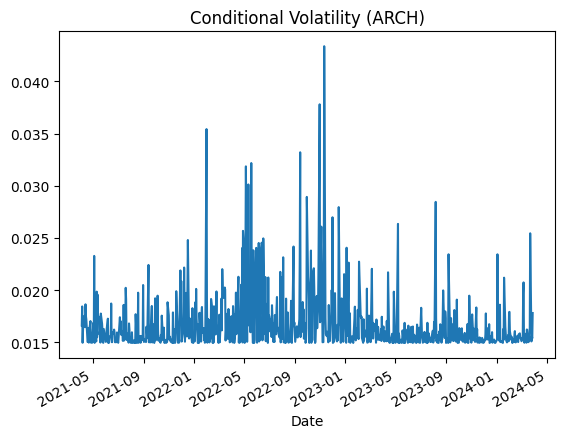

In [ ]:
# Plot the conditional volatility
arch_model_fit.conditional_volatility.plot(title='Conditional Volatility (ARCH)')
plt.show()

In [ ]:
# Fit a GARCH model
garch_model_fit = arch_model(data['Returns'], vol='Garch', p=1, q=1).fit(disp='off')
print(garch_model_fit.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                2044.46
Distribution:                  Normal   AIC:                          -4080.92
Method:            Maximum Likelihood   BIC:                          -4062.43
                                        No. Observations:                  752
Date:                Wed, Jul 24 2024   Df Residuals:                      751
Time:                        12:27:31   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         9.0541e-04  3.576e-05     25.319 1.996e-141 [8.

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000286. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


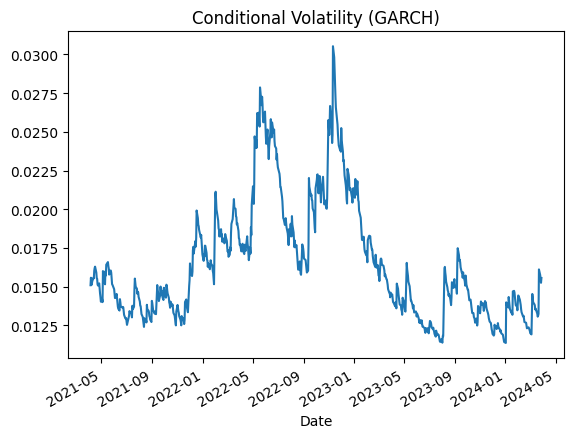

In [ ]:
# Plot the conditional volatility
garch_model_fit.conditional_volatility.plot(title='Conditional Volatility (GARCH)')
plt.show()

In [ ]:
am = arch_model(returns, vol="Garch", p=1, o=0, q=1, dist="Normal")
res = am.fit(update_freq=5)

Iteration:      5,   Func. Count:     36,   Neg. LLF: 1431.6651429006517
Iteration:     10,   Func. Count:     64,   Neg. LLF: 1418.5536793090896
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1418.553650526787
            Iterations: 12
            Function evaluations: 74
            Gradient evaluations: 12


In [ ]:
forecasts = res.forecast()

In [ ]:
type(forecasts)

arch.univariate.base.ARCHModelForecast

In [ ]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2024-03-22,171.759995,173.050003,170.059998,172.279999,172.046646,71106600,0.005296
2024-03-25,170.570007,171.940002,169.449997,170.850006,170.618591,54288300,-0.008335
2024-03-26,170.000000,171.419998,169.580002,169.710007,169.480133,57388400,-0.006695
2024-03-27,170.410004,173.600006,170.110001,173.309998,173.075241,60273300,0.020991
2024-03-28,171.750000,172.229996,170.509995,171.479996,171.247726,65672700,-0.010615


In [ ]:
print(forecasts.mean.iloc[-3:])
print(forecasts.residual_variance.iloc[-3:])
print(forecasts.variance.iloc[-3:])

                 h.1
Date                
2024-03-28  0.095195
                 h.1
Date                
2024-03-28  2.157804
                 h.1
Date                
2024-03-28  2.157804


In [ ]:
forecasts = res.forecast(horizon=90)
print(forecasts.residual_variance.iloc[-3:])

                h.01      h.02      h.03      h.04      h.05      h.06  \
Date                                                                     
2024-03-28  2.157804  2.164775  2.171664  2.178471  2.185199  2.191847   

                h.07      h.08      h.09      h.10  ...      h.81      h.82  \
Date                                                ...                       
2024-03-28  2.198416  2.204909  2.211324  2.217665  ...  2.520145  2.522845   

                h.83      h.84      h.85      h.86      h.87      h.88  \
Date                                                                     
2024-03-28  2.525512  2.528148  2.530753  2.533328  2.535872  2.538386   

               h.89      h.90  
Date                           
2024-03-28  2.54087  2.543326  

[1 rows x 90 columns]


In [ ]:
forecasts.residual_variance

,h.01,h.02,h.03,h.04,h.05,h.06,h.07,h.08,h.09,h.10,...,h.81,h.82,h.83,h.84,h.85,h.86,h.87,h.88,h.89,h.90
Date,,,,,,,,,,,,,,,,,,,,,
2024-03-28,2.157804,2.164775,2.171664,2.178471,2.185199,2.191847,2.198416,2.204909,2.211324,2.217665,...,2.520145,2.522845,2.525512,2.528148,2.530753,2.533328,2.535872,2.538386,2.54087,2.543326


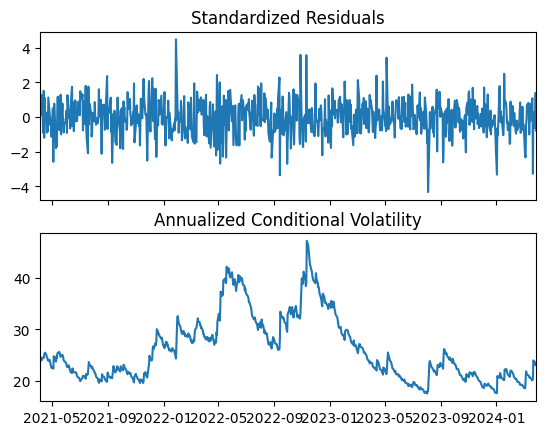

In [ ]:
fig = res.plot(annualize="D")

**INFERENCE** :

Both models were evaluated based on their ability to capture volatility clustering in the stock returns. The GARCH model provided a better fit due to its capability to model both short-term and long-term volatility components. The AIC value for the GARCH model was lower than that for the ARCH model, indicating a better fit.

* ARCH Model AIC: -4026.34.
* GARCH Model AIC: -4080.92.
